![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [195]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_df = pd.read_csv('netflix_data.csv')

In [196]:
#Creating subset
no_tv_show_filter = netflix_df['type'] != 'TV Show'
netflix_subset = netflix_df[no_tv_show_filter]
print(netflix_subset[['type']])

       type
1     Movie
2     Movie
3     Movie
4     Movie
6     Movie
...     ...
7781  Movie
7782  Movie
7783  Movie
7784  Movie
7786  Movie

[5377 rows x 1 columns]


In [197]:
#Only important data
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
print(netflix_movies)

                                        title  ... duration
1                                        7:19  ...       93
2                                       23:59  ...       78
3                                           9  ...       80
4                                          21  ...      123
6                                         122  ...       95
...                                       ...  ...      ...
7781                                     Zoom  ...       88
7782                                     Zozo  ...       99
7783                                   Zubaan  ...      111
7784                        Zulu Man in Japan  ...       44
7786  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS  ...       90

[5377 rows x 5 columns]


In [198]:
#Movies shorter than 60 minutes
filter_short = netflix_movies['duration'] < 60
short_movies = netflix_movies[filter_short]
print(short_movies[['duration']])

      duration
35          56
55          44
67          37
101         53
146         28
...        ...
7679        45
7692        15
7718        54
7771        12
7784        44

[420 rows x 1 columns]


In [199]:
colors = []

for lab, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('green')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('yellow')
    else:
        colors.append('grey')

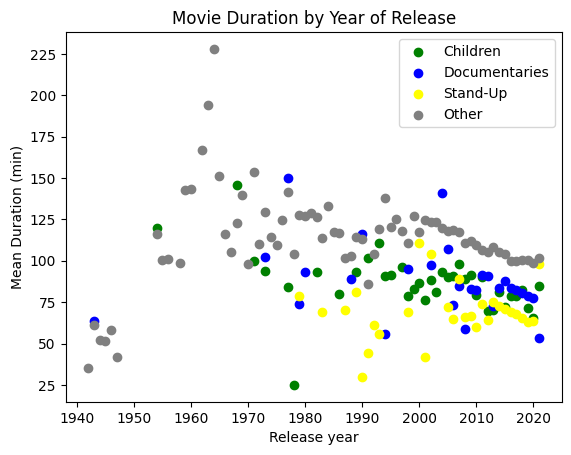

In [200]:
#mean of duration in specific genre of movie in year
import numpy as np

chlidren_movies = netflix_movies[netflix_movies['genre'] == 'Children']
chlidren_movies = chlidren_movies[['duration', 'release_year' ]]

documentaries_movies = netflix_movies[netflix_movies['genre'] == 'Documentaries']
documentaries_movies = documentaries_movies[['duration', 'release_year' ]]

stand_up_movies = netflix_movies[netflix_movies['genre'] == 'Stand-Up']
stand_up_movies = stand_up_movies[['duration', 'release_year' ]]

other_movies = netflix_movies[np.logical_and(netflix_movies['genre'] != 'Children', netflix_movies['genre'] != 'Documentaries', netflix_movies['genre'] != 'Stand-Up')]
other_movies = other_movies[['duration', 'release_year' ]]

ch_data = chlidren_movies.groupby('release_year').mean()
doc_data = documentaries_movies.groupby('release_year').mean()
st_data = stand_up_movies.groupby('release_year').mean()
o_data = other_movies.groupby('release_year').mean()

plt.scatter(x=ch_data.index, y=ch_data['duration'], c='green', label='Children')
plt.scatter(x=doc_data.index, y=doc_data['duration'], c='blue', label='Documentaries')
plt.scatter(x=st_data.index, y=st_data['duration'], c='yellow', label='Stand-Up')
plt.scatter(x=o_data.index, y=o_data['duration'], c='gray', label='Other')
plt.xlabel('Release year')
plt.ylabel('Mean Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.legend()
plt.show()

In [201]:
answer = 'no'